# Examine Trained RNN Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import motion, path_rnn

In [2]:
# Directory where test data is loaded from
TEST_DATA_DIR = 'data/sim_2022_04_12'

# Path where model is saved
MODEL_FPATH = 'models/test_2022_04_12.pt'

# Number of units in RNN
NUM_UNITS = 100

## Load test data

In [3]:
sim_params, vel, pos = motion.load_simulation_results(TEST_DATA_DIR)

## Load model

In [4]:
model = path_rnn.PathRNN(n_units=NUM_UNITS)
model.load_state_dict(torch.load(MODEL_FPATH))
model.eval();

## Run model on all trials

In [5]:
# Convert velocity array to Tensor in order to run model
vel_t = torch.Tensor(vel)

# Predict estimated position
pos_est_t = model(vel_t)

# Convert estimated position back to Numpy array
pos_est = pos_est_t[0].detach().numpy()

## Plot results

In [6]:
if sim_params['boundary_type'] == 'square':
    boundary = motion.SquareBoundary(sim_params['boundary_height'])
else:
    raise ValueError(f'Boundary not supported.')

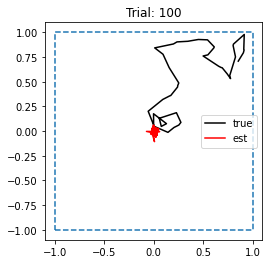

In [8]:
trial_plt = 100

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_title(f'Trial: {trial_plt}')
motion.plot_position_estimate(boundary, pos[trial_plt], pos_est[trial_plt], ax)

In [9]:
for name, param in model.rnn.named_parameters():
    print(name)

weight_ih_l0
weight_hh_l0
bias_ih_l0
bias_hh_l0
